In [37]:
import sys
sys.path.append("..")

from qiskit.providers.fake_provider import Fake27QPulseV1, Fake5QV1, Fake20QV1,Fake7QPulseV1
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from src.state_of_the_art.sabre import run_sabre
from src.state_of_the_art.cirq import run_cirq,from_backend_to_edges
from src.state_of_the_art.pytket import run_pyket
from src.state_of_the_art.qmap import run_qmap
from src.isl_routing.mapping.routing import POLY_QMAP
from src.isl_routing.utils.isl_data_loader import *
from src.isl_routing.utils.circuit_utils import *
from src.visiualisation.plots import *
from time import time
import warnings
warnings.filterwarnings("ignore")


In [38]:
edges = Fake7QPulseV1().configuration().coupling_map

In [39]:
file_path = f"../benchmarks/polyhedral/ibmqx/test.json"
data = json_file_to_isl(file_path) 

In [40]:
poly_mapper = POLY_QMAP(edges, data)
poly_mapper.run(heuristic_method="closure",initial_mapping_method="trivial")

poly_mapper.results[0]

{'swap_count': 3, 'circuit_depth': 8}

In [41]:
print("correct swaps :",poly_mapper.circuit.count_ops().get("swap", 0) ," correct depth: ", poly_mapper.circuit.depth())

correct swaps : 3  correct depth:  8


In [67]:
sabre = run_sabre(data, edges,layout="trivial") 


print("swaps :",sabre["swap_count"])
print("depth :",sabre["circuit_depth"])

swaps : 3
depth : 9


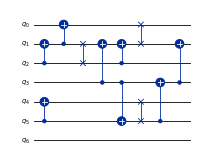

In [68]:
poly_mapper.circuit.draw(output="mpl",scale=0.3)

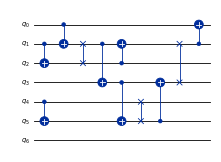

In [69]:
sabre["circuit"].draw(output="mpl",scale=0.3)

In [25]:
from qiskit.transpiler import CouplingMap

def is_routable(circuit, edges):

    cm = CouplingMap(edges)
    
    for instr, qargs, _ in circuit.data:
        if instr.num_qubits > 1:

            q0 = qargs[0]._index
            q1 = qargs[1]._index

            if cm.distance(q0, q1) != 1:
                print(f"Gate {instr.name} on qubits {q0} and {q1} is not directly supported.")
                return False
    return True


routable = is_routable(poly_mapper.circuit, edges)
if routable:
    print("The circuit is directly routable on the backend.")
else:
    print("The circuit is NOT directly routable on the backend.")


The circuit is directly routable on the backend.


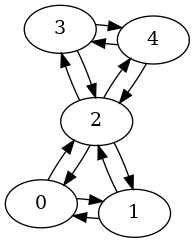

In [26]:
cm = CouplingMap(edges)
cm.draw()